In [15]:
import tensorflow as tf 
tf.__version__

'2.17.0'

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [21]:
bach_size = 16
img_size = 224
channels = 3
dataset = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\bhoir\Downloads\drowsiness detection\Prepared Eyes Dataset", 
                                                              shuffle = True, 
                                                              batch_size = bach_size, 
                                                              image_size = (img_size, img_size),
                                                             )

Found 7970 files belonging to 2 classes.


In [22]:
labels = dataset.class_names
labels

['Closed Eyes', 'Open Eyes']

In [23]:
len(dataset)

499

(-0.5, 223.5, 223.5, -0.5)

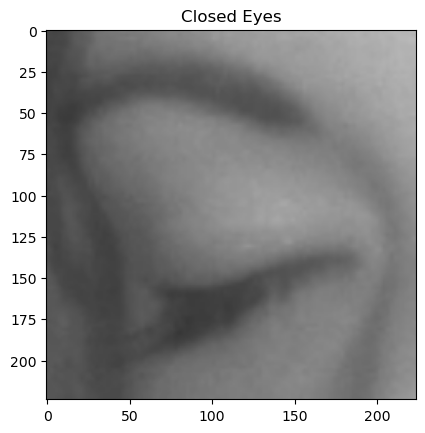

In [24]:
for img_, label_ in dataset.take(1):
    image = img_[0].numpy().astype('uint8') #actual image
    label = label_[0].numpy()  #index of label

plt.title(labels[label])
plt.imshow(image, cmap = 'gray')
plt.axis()


In [25]:
def train_test_split(data, train = 0.8, test = 0.1, val = 0.1, shuffle = True, shuffle_size = 10000):
    if shuffle:
        ds = data.shuffle(shuffle_size, seed = 20)
        
    data_size= len(ds)
    train_size = int(train * data_size)
    val_size = int(val * data_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    
    

In [26]:
train, val, test = train_test_split(dataset, train = 0.8, val = 0.1, test = 0.1)
print("training set= ", len(train), "\nvalidation set= ", len(val), "\ntesting set= ", len(test) )

training set=  399 
validation set=  49 
testing set=  51


**Model Transfer lerning**

In [14]:
model1 = tf.keras.applications.mobilenet.MobileNet()
model1.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [35]:
for layer in model1.layers:
    layer.trainable = False

In [36]:
base_input = model1.input
base_output = model1.layers[-4].output

flatten = layers.Flatten()(base_output)
dense = layers.Dense(1)(flatten)
dropout = layers.Dropout(0.2)(dense)
final_output = layers.Activation('sigmoid')(dropout)


In [37]:
from tensorflow import keras

In [38]:
new_model1 = keras.Model(inputs = base_input, outputs = final_output)

In [39]:
new_model1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [40]:
new_model1.compile(loss='binary_crossentropy', 
                   optimizer = 'adam', 
                   metrics = ['accuracy'])

In [41]:
history = new_model1.fit(train, validation_data= val, batch_size = bach_size, verbose=1, epochs = 5,)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 201s 426ms/step - accuracy: 0.6828 - loss: 0.5480 - val_accuracy: 0.8878 - val_loss: 0.3622
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 187s 446ms/step - accuracy: 0.8298 - loss: 0.3687 - val_accuracy: 0.9375 - val_loss: 0.2635
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 197s 459ms/step - accuracy: 0.8422 - loss: 0.3109 - val_accuracy: 0.9439 - val_loss: 0.2168
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 174s 412ms/step - accuracy: 0.8563 - loss: 0.2783 - val_accuracy: 0.9375 - val_loss: 0.2057
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 172s 411ms/step - accuracy: 0.8544 - loss: 0.2651 - val_accuracy: 0.9349 - val_loss: 0.1829


In [45]:
print(history.history)

{'accuracy': [0.7543859481811523, 0.8381475806236267, 0.8507205247879028, 0.856203019618988, 0.8585557341575623], 'loss': [0.48298177123069763, 0.35271504521369934, 0.2991856634616852, 0.27586689591407776, 0.2584238052368164], 'val_accuracy': [0.8877550959587097, 0.9375, 0.9438775777816772, 0.9375, 0.9349489808082581], 'val_loss': [0.3622363209724426, 0.26349687576293945, 0.2168249934911728, 0.2056909054517746, 0.18285545706748962]}


In [47]:
new_model1.evaluate(test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 382ms/step - accuracy: 0.9610 - loss: 0.1523


[0.15953953564167023, 0.9583333134651184]

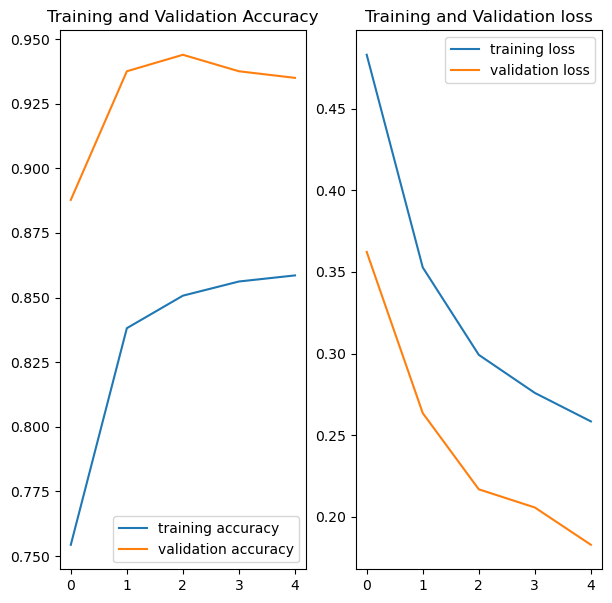

In [49]:
epochs=5

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(epochs), acc, label = 'training accuracy')
plt.plot(range(epochs), val_acc, label = 'validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epochs), loss, label= "training loss")
plt.plot(range(epochs), val_loss, label = 'validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

plt.show()
    

In [ ]:
new_model1.save("ModelE5.h5")

**loading the nodel from directory**

In [27]:
from tensorflow.keras import models, layers
import numpy as np
from tensorflow import keras

In [28]:
model = models.load_model('ModelE5_85.h5')  #renamed

In [29]:
model.evaluate(test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 44s 363ms/step - accuracy: 0.9446 - loss: 0.1969


[0.18628987669944763, 0.9448529481887817]

In [30]:
model.save('ModelE5_94.h5') #saving of model after evaluation.

In [29]:
labels = ['Closed Eyes', 'Open Eyes']
import numpy as np

for images_batch, labels_batch in test.take(1):
    img, label = images_batch[0].numpy(), labels_batch[0].numpy()
    batch_prediction = model.predict(images_batch)
    print(labels_batch)
    print(batch_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
tf.Tensor([1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1], shape=(16,), dtype=int32)
[[0.8701842 ]
 [0.03979661]
 [0.03938883]
 [0.04038131]
 [0.01883733]
 [0.8447802 ]
 [0.23357368]
 [0.9276886 ]
 [0.15252748]
 [0.6521635 ]
 [0.04049954]
 [0.97975117]
 [0.04570774]
 [0.9994391 ]
 [0.99883217]
 [0.7409424 ]]


In [30]:
predicted = []

for i in range(16):
    if batch_prediction[i][0] >= 0.50:
        predicted.append(1)
    else:
        predicted.append(0)

print('actual labels: ', labels_batch.numpy())
print('predicted labels', predicted)

actual labels:  [1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1]
predicted labels [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]


In [31]:
def predict_class(model, img):
    image = tf.keras.preprocessing.image.img_to_array(img)
    image = tf.expand_dims(image, 0)
    prediction = model.predict(image)
    if prediction >= 0.50:
        predicted = 1
    else:
        predicted = 0
        
    return predicted


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


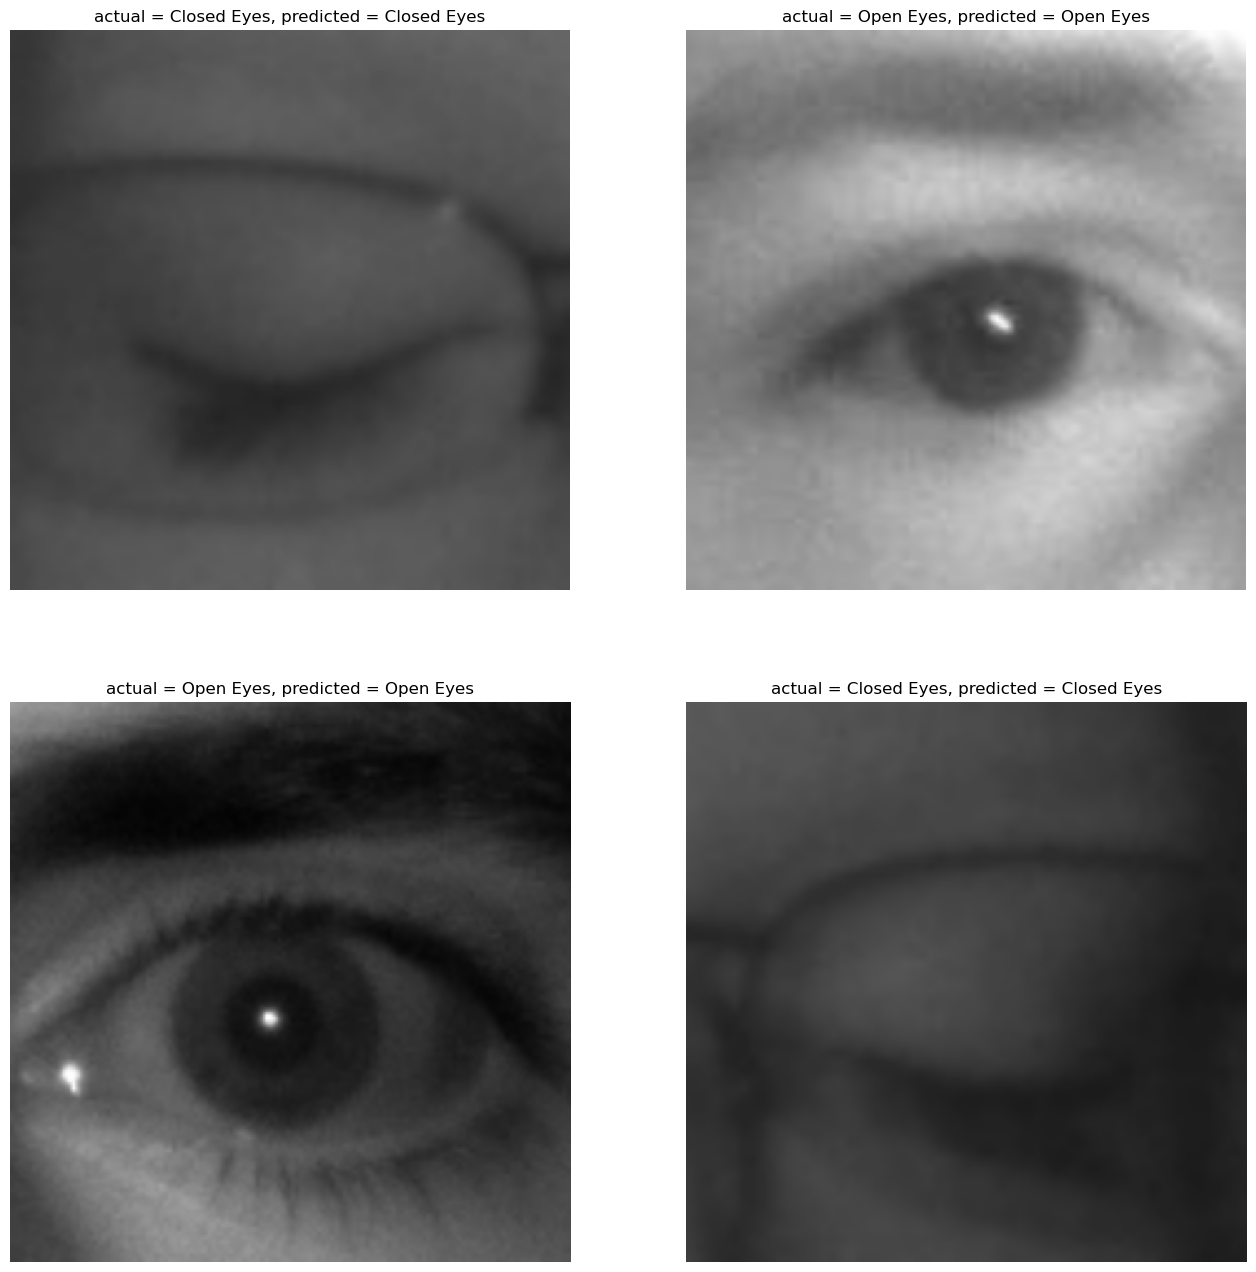

In [32]:
plt.figure(figsize=(16, 16))

for img_, labels_ in test.take(1):
    for i in range(4):
        predicted_label = labels[predict_class(model, img_[i].numpy())]
        actual_label = labels[labels_[i].numpy()]
        plt.subplot(2,2,i+1)
        plt.title(f'actual = {actual_label}, predicted = {predicted_label}')
        plt.imshow(img_[i].numpy().astype('uint8'))
        plt.axis("off")


****Testing on Random images from google****

In [32]:
from tensorflow.keras import models 
from tensorflow import keras
import tensorflow as tf
import numpy as np
labels = ['Closed Eyes', 'Open Eyes']

In [33]:
saved_model = models.load_model('ModelE5_94.h5')

In [34]:
loss, accuracy = saved_model.evaluate(test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 374ms/step - accuracy: 0.9621 - loss: 0.1612


In [36]:
loss, accuracy

(0.17643022537231445, 0.9476309418678284)

In [37]:
saved_model.save('ModelE5_94.h5')

In [38]:
saved_model = models.load_model('ModelE5_94.h5')

In [ ]:
import os
from PIL import Image

# Directory containing images
image_folder = "testing images"

# Iterate through all files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg")):  # Check for image extensions
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)  # read the image
        gray_image = image.convert("L") # gray image
        gray_image.show()
        image = image.resize((224, 224))  # Example size, adjust according to your model's requirements
       
        # Convert the image to a NumPy array
        image = np.array(image)
        predicted_label = labels[predict_class(saved_model, image)]

        print(f'actual = {filename}, predicted = {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
actual = close eye1.jpg, predicted = Closed Eyes
